In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plot_helper import create_communication_boxplot
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
data_frames = {
    "a280"  : "scaling_test_a280_Jan_06_214509_periods_periods.gz",
    "d1291" : "scaling_test_d1291_final_periods.gz",
    "u2319" : "scaling_test_u2319_Jan_07_135659_periods_periods.gz",
    "bier127" : "scaling_test_bier127_Jan_10_113307_periods_periods.gz"
}

# bier127

C:\Users\valen\Miniconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


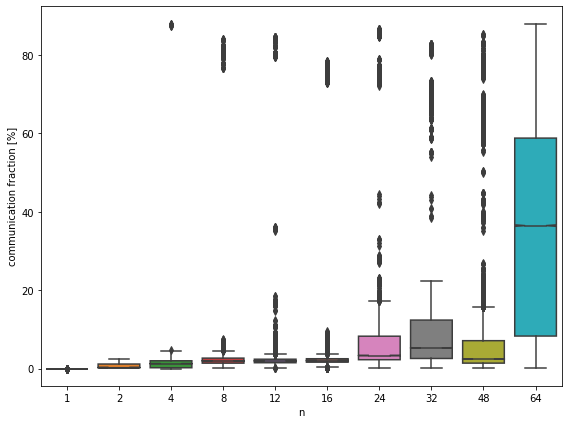

In [3]:
df = pd.read_csv(data_frames["bier127"])
create_communication_boxplot(df[df["rep"] < 3], "bier127")

# a280

C:\Users\valen\Miniconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


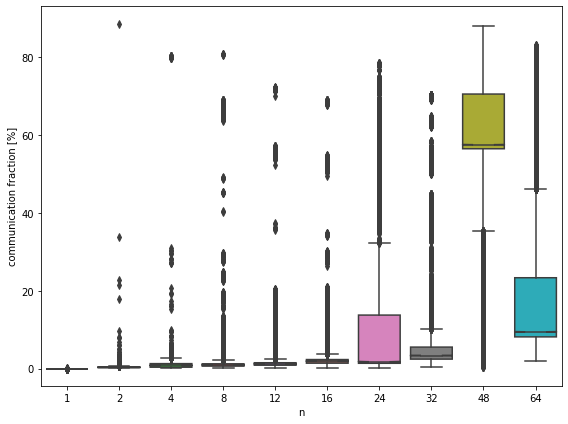

In [4]:
df = pd.read_csv(data_frames["a280"])
create_communication_boxplot(df[df["rep"] < 3], "a280")

# d1291

C:\Users\valen\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\valen\Miniconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


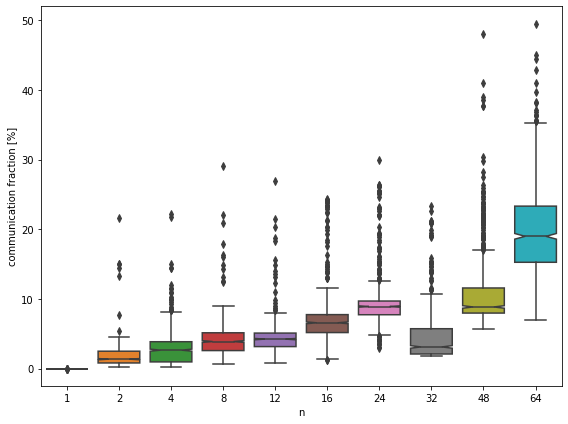

In [5]:
df = pd.read_csv(data_frames["d1291"])
create_communication_boxplot(df[df["rank"] == 0][df["rep"] == 0], "d1291")

In [6]:
df = df[df["rank"] == 0]
to_keep = list(df.columns)
to_keep.remove("time")
to_keep.remove("type")
summed_df = df.groupby(to_keep, as_index=False).agg({"time" : "sum"})
summed_df["type"] = "sum"
df_bar = df.copy()
df_bar = df_bar.append(summed_df, ignore_index=True)
df_sum = df_bar[df_bar["type"] == "sum"].rename(columns={"time" : "sum"}).drop(columns=["type"])
df_comm = df_bar[df_bar["type"] == "communication"].rename(columns={"time" : "communication"}).drop(columns=["type"])
df_comp = df_bar[df_bar["type"] == "computation"].rename(columns={"time" : "computation"}).drop(columns=["type"])
df_mix = pd.merge(df_sum, df_comm,  how='left', on=["rep", "rank", "n", "mode", "elite_size", "epochs", "log_freq", "migration_amount", "period", "population"])
df_mixed = pd.merge(df_mix, df_comp, how="left", on=["rep", "rank", "n", "mode", "elite_size", "epochs", "log_freq", "migration_amount", "period", "population"])
df_mixed["communication"] = (df_mixed["communication"] / df_mixed["sum"]) * 100
df_mixed["computation"] = (df_mixed["computation"] / df_mixed["sum"]) * 100

C:\Users\valen\Miniconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [7]:
df_mixed[df_mixed["period"] != 0].groupby(["n"]).agg({"count"})

,elite_size,epochs,log_freq,migration_amount,mode,period,population,rank,rep,sum,communication,computation
,count,count,count,count,count,count,count,count,count,count,count,count
n,,,,,,,,,,,,
1,22475,22475,22475,22475,22475,22475,22475,22475,22475,22475,22475,22475
2,23325,23325,23325,23325,23325,23325,23325,23325,23325,23325,23325,23325
4,24475,24475,24475,24475,24475,24475,24475,24475,24475,24475,24475,24475
8,24900,24900,24900,24900,24900,24900,24900,24900,24900,24900,24900,24900
12,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825
16,24800,24800,24800,24800,24800,24800,24800,24800,24800,24800,24800,24800
24,24650,24650,24650,24650,24650,24650,24650,24650,24650,24650,24650,24650
32,24550,24550,24550,24550,24550,24550,24550,24550,24550,24550,24550,24550


# u2319

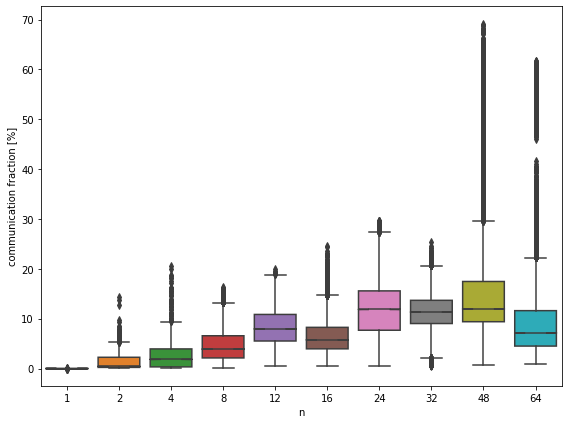

In [8]:
df = pd.read_csv(data_frames["u2319"])
create_communication_boxplot(df[df["rep"] < 3], "u2319")